Importing  Neccesary Libraries 

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Data Preparation

In [169]:
heart_df = pd.read_csv("/content/framingham.csv")
heart_df.describe

<bound method NDFrame.describe of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0      

Dropping Education Column

In [170]:
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Removing missing values

In [171]:
heart_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [172]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is',count)
print('Since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is 489
Since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [173]:
heart_df.dropna(axis=0,inplace=True)

In [174]:
heart_df.describe

<bound method NDFrame.describe of       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4231     1   58              0         0.0     0.0                0   
4232     1   68              0         0.0     0.0                0   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  1

Exploratory Analysis 

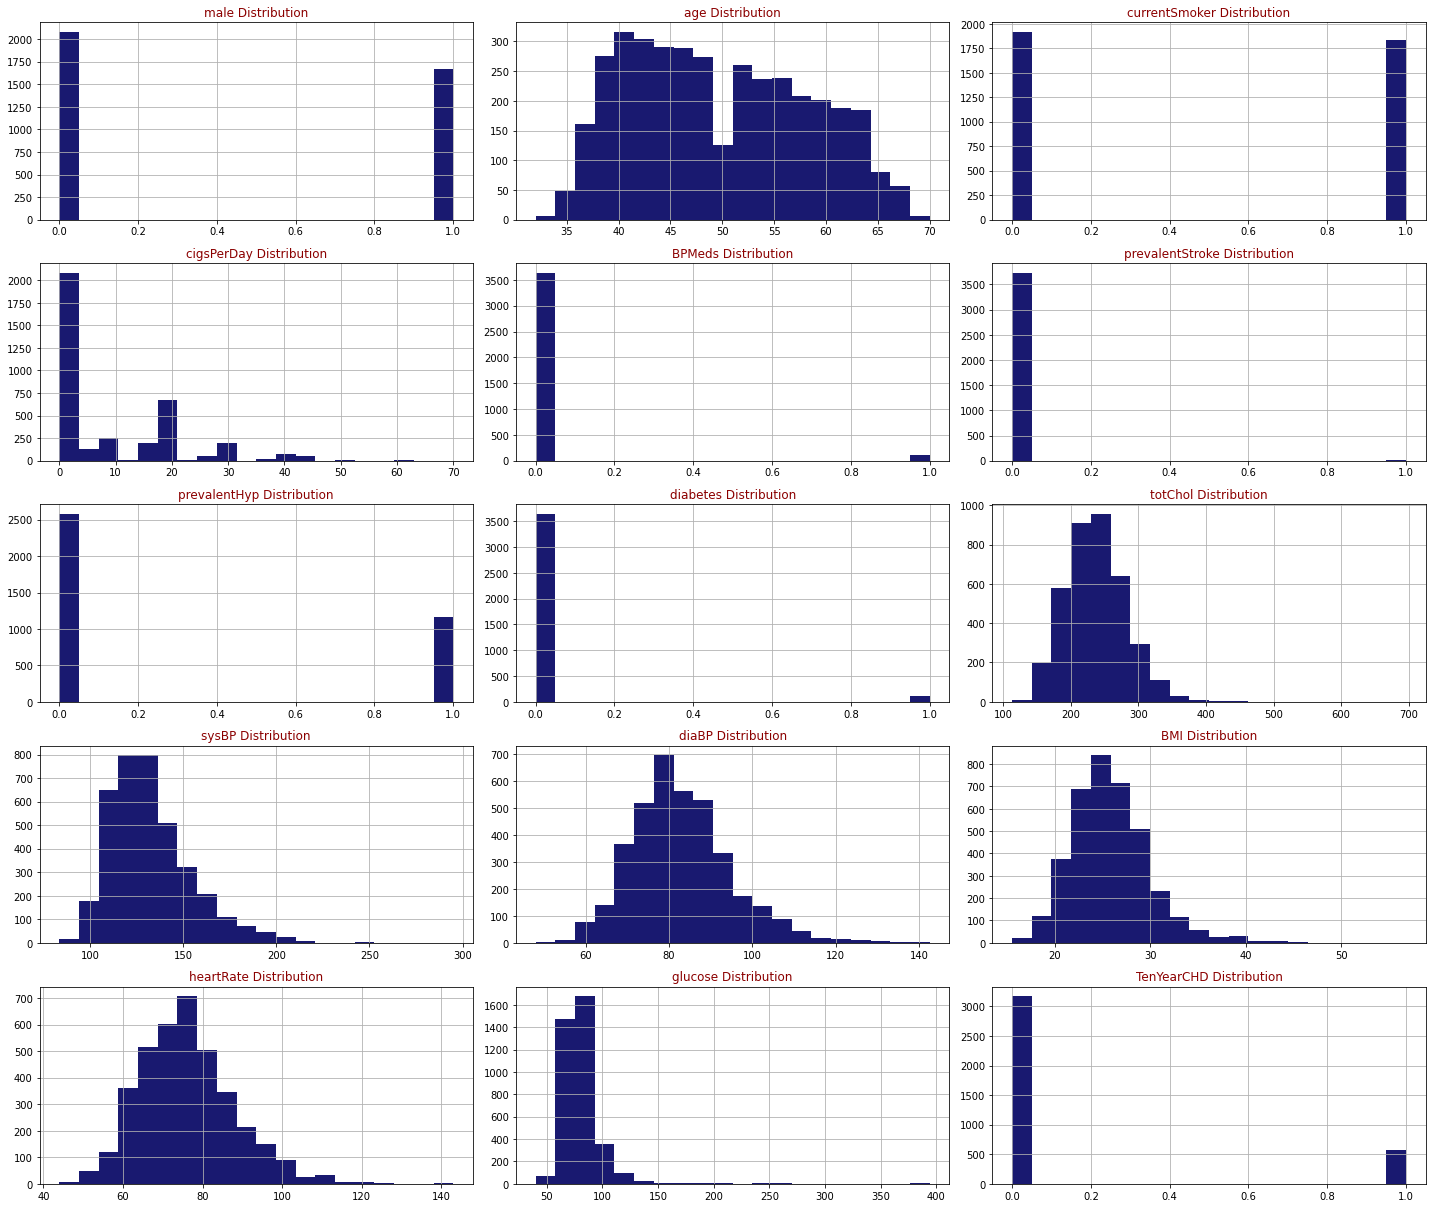

In [175]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [176]:
heart_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

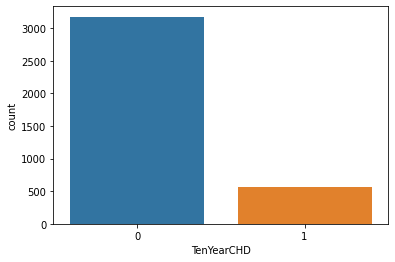

In [177]:
sn.countplot(x='TenYearCHD',data=heart_df)

There are 3179 patients with no heart disease and 572 patients with risk of heart disease.

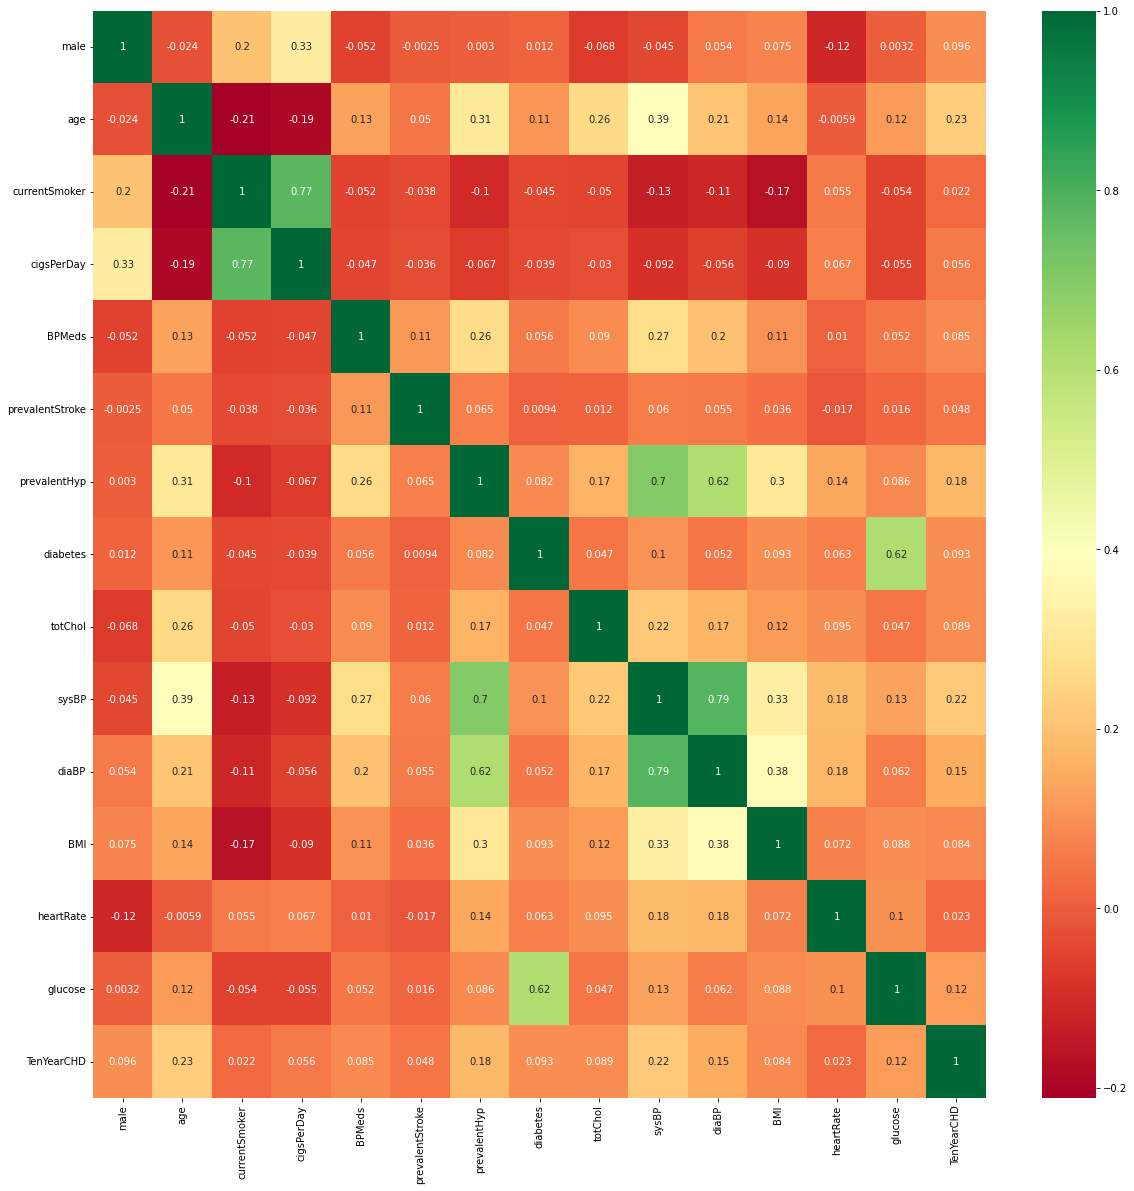

In [178]:
corrmat = heart_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sn.heatmap(heart_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

'age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose' are the features we have chosen after studying the heatmap as they have higher levels of corelation with the target - 'TenYearCHD'.

Splitting data for training and testing

In [179]:
import sklearn
new_features=heart_df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

**Model No 1 - Logistic Regression**

In [180]:
from sklearn.linear_model import LogisticRegression
logregmodel=LogisticRegression()
logregmodel.fit(x_train,y_train)
y1_pred=logregmodel.predict(x_test)

Model Evaluation

In [181]:
sklearn.metrics.accuracy_score(y_test,y1_pred)

0.884

Accuracy of the model is 88.4%

Confusion matrix

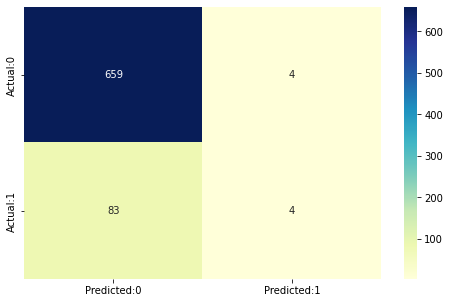

In [183]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y1_pred)
conf_matrix1=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix1,annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 659+4 = 663 correct predictions and 83+4= 87 incorrect ones.\
True Positives: 4\
True Negatives: 659\
False Positives: 4 (Type I error)\
False Negatives: 83 ( Type II error)

In [211]:
TN1=cm1[0,0]
TP1=cm1[1,1]
FN1=cm1[1,0]
FP1=cm1[0,1]

Model Evaluation - Statistics

In [217]:
accuracy1=(TP1+TN1)/float(TP1+TN1+FP1+FN1)
precision1=TP1/float(TP1+FP1)
recall1=TP1/float(TP1+FN1)
fmeasure1=(2*precision1*recall1)/(precision1+recall1)

print('FOR LOGISTIC REGRESSEION model:\n', 
'Accuracy = TP+TN/(TP+TN+FP+FN) = ',accuracy1,'\n',
'Precision = TP/(TP+FP) = ',precision1,'\n',
'Recall = TP/(TP+FN) = ',recall1,'\n',
'F-Measure = (2*Precision*Recall)/(Precision+Recall) = ',fmeasure1)

FOR LOGISTIC REGRESSEION model:
 Accuracy = TP+TN/(TP+TN+FP+FN) =  0.884 
 Precision = TP/(TP+FP) =  0.5 
 Recall = TP/(TP+FN) =  0.04597701149425287 
 F-Measure = (2*Precision*Recall)/(Precision+Recall) =  0.08421052631578949


**Model No 2 - Naive Bayes Classifier**

In [186]:
from sklearn.naive_bayes import GaussianNB
naivebayesmodel=GaussianNB()
naivebayesmodel.fit(x_train,y_train)
y2_pred=naivebayesmodel.predict(x_test)

Model Evaluation

In [187]:
sklearn.metrics.accuracy_score(y_test,y2_pred)

0.8653333333333333

Accuracy of the model is 86.53%

Confusion matrix

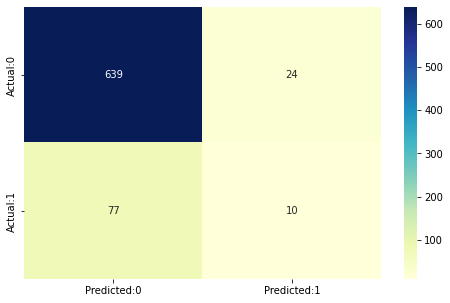

In [188]:
cm2=confusion_matrix(y_test,y2_pred)
conf_matrix2=pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix2,annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 639+10 = 649 correct predictions and 77+24 101 incorrect ones.\
True Positives: 10\
True Negatives: 639\
False Positives: 24 (Type I error)\
False Negatives: 77 ( Type II error)

In [213]:
TN2=cm2[0,0]
TP2=cm2[1,1]
FN2=cm2[1,0]
FP2=cm2[0,1]

Model Evaluation - Statistics

In [218]:
accuracy2=(TP2+TN2)/float(TP2+TN2+FP2+FN2)
precision2=TP2/float(TP2+FP2)
recall2=TP2/float(TP2+FN2)
fmeasure2=(2*precision2*recall2)/(precision2+recall2)

print('FOR NAIVE BAYES model:\n', 
'Accuracy = TP+TN/(TP+TN+FP+FN) = ',accuracy2,'\n',
'Precision = TP/(TP+FP) = ',precision2,'\n',
'Recall = TP/(TP+FN) = ',recall2,'\n',
'F-Measure = (2*Precision*Recall)/(Precision+Recall) = ',fmeasure2)

FOR NAIVE BAYES model:
 Accuracy = TP+TN/(TP+TN+FP+FN) =  0.8653333333333333 
 Precision = TP/(TP+FP) =  0.29411764705882354 
 Recall = TP/(TP+FN) =  0.11494252873563218 
 F-Measure = (2*Precision*Recall)/(Precision+Recall) =  0.16528925619834708


**Model No 3 - Decision Tree**

In [232]:
from sklearn.tree import DecisionTreeClassifier
dectreemodel=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dectreemodel.fit(x_train,y_train)
y3_pred=dectreemodel.predict(x_test)

Model Evaluation

In [233]:
sklearn.metrics.accuracy_score(y_test,y3_pred)

0.8826666666666667

Accuracy of the model is 88.26%

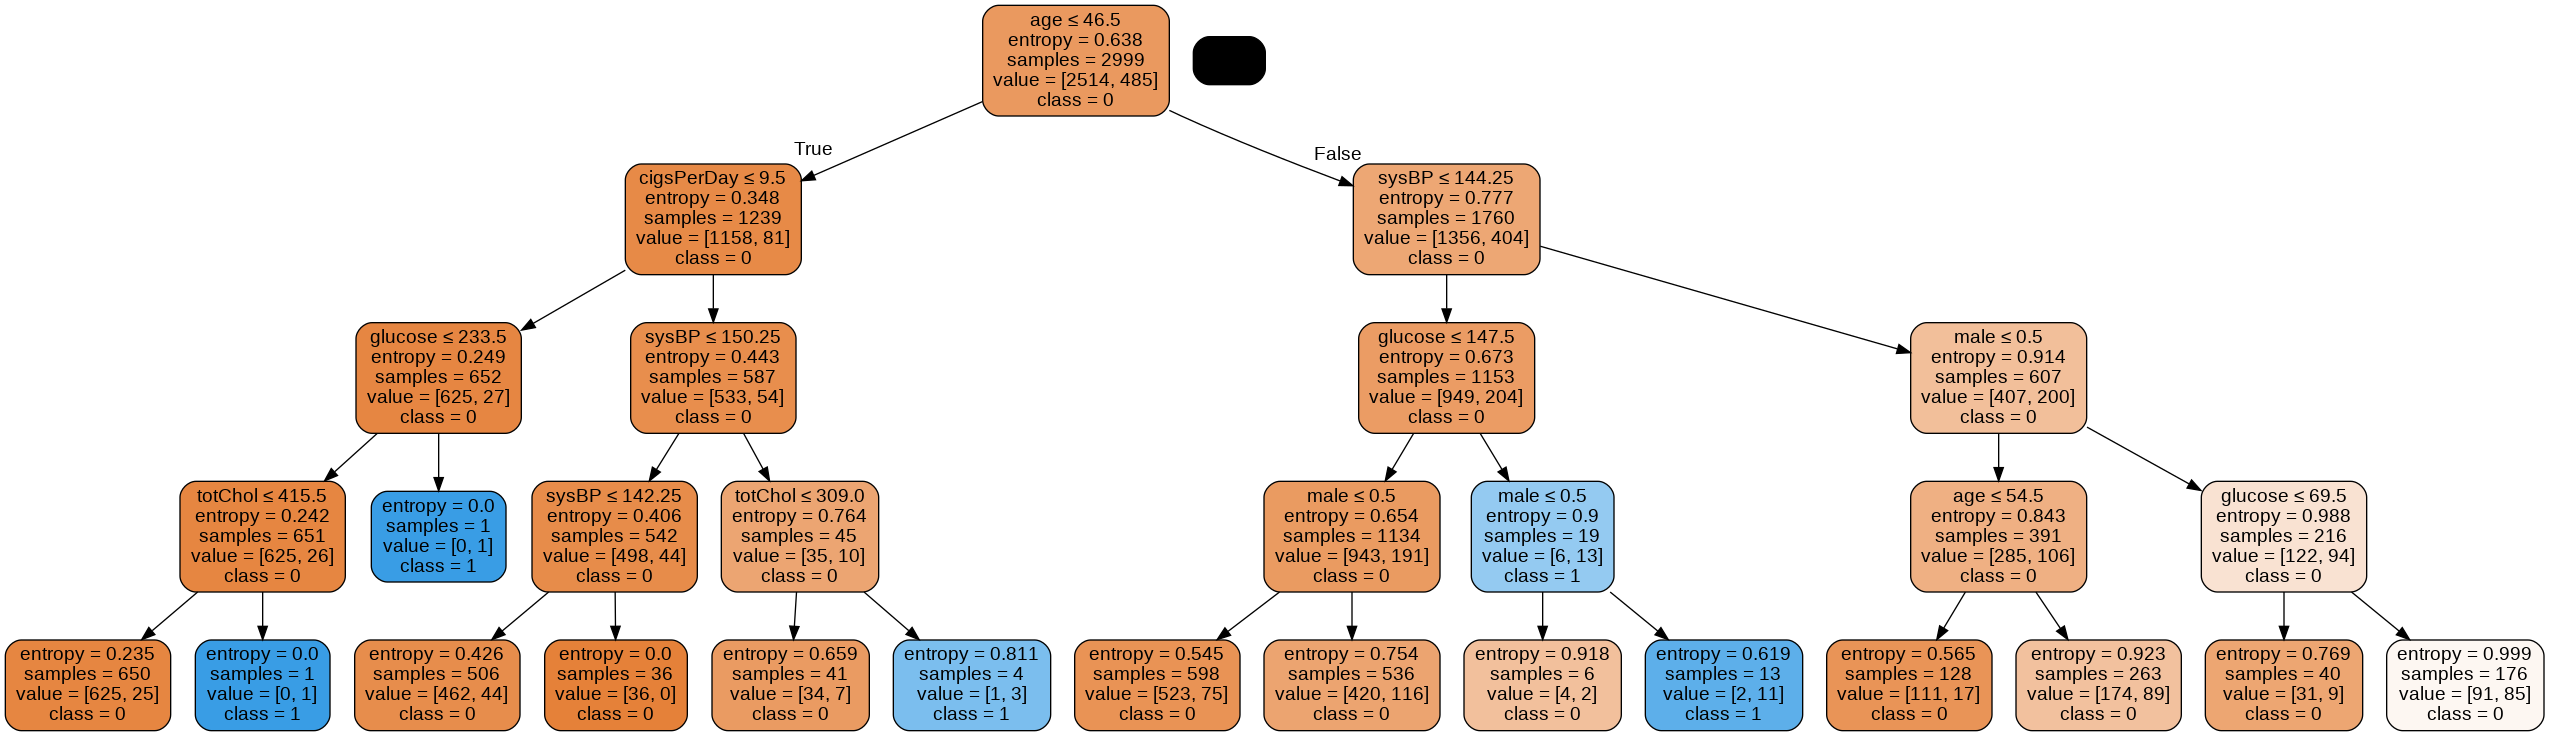

In [207]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
feature_cols=['age','male','cigsPerDay','totChol','sysBP','glucose']
dot_data=StringIO()
export_graphviz(dectreemodel,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Confusion matrix

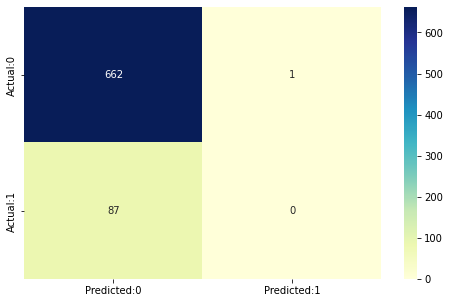

In [234]:
cm3=confusion_matrix(y_test,y3_pred)
conf_matrix1=pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix1,annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 662+0 = 662 correct predictions and 87+1= 88 incorrect ones.\
True Positives: 0\
True Negatives: 662\
False Positives: 1 (Type I error)\
False Negatives: 87 ( Type II error)

In [215]:
TN3=cm3[0,0]
TP3=cm3[1,1]
FN3=cm3[1,0]
FP3=cm3[0,1]

Model Evaluation - Statistics

In [220]:
accuracy3=(TP3+TN3)/float(TP3+TN3+FP3+FN3)
precision3=TP3/float(TP3+FP3)
recall3=TP3/float(TP3+FN3)
fmeasure3=(2*precision3*recall3)/(precision3+recall3)

print('FOR DECISION TREE model:\n', 
'Accuracy = TP+TN/(TP+TN+FP+FN) = ',accuracy3,'\n',
'Precision = TP/(TP+FP) = ',precision3,'\n',
'Recall = TP/(TP+FN) = ',recall3,'\n',
'F-Measure = (2*Precision*Recall)/(Precision+Recall) = ',fmeasure3)

FOR DECISION TREE model:
 Accuracy = TP+TN/(TP+TN+FP+FN) =  0.8826666666666667 
 Precision = TP/(TP+FP) =  0.0 
 Recall = TP/(TP+FN) =  0.0 
 F-Measure = (2*Precision*Recall)/(Precision+Recall) =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


**Conclusions:**

•	The LOGISTIC REGRESSION model predicted with 88.4% accuracy. 
The model is more specific than sensitive, i.e., it predicts class 0 with much more accuracy than class 1.\
•	The NAIVE BAYES CLASSIFIER model predicted with 86.5% accuracy. 
It has highest recall value among all the 3 models.\
•	The DECISION TREE model predicted with 88.2% accuracy.
The model is more specific than sensitive.\
•	Models 1 and 3 have poor performance for detecting positives, hence will be highly inefficient disease prediction models. In this application, it is better to have false positive (type I error) than false negative (type II error) as false negative could cost someone’s life. As model 2 is matching this pattern it is best fit for this application.\
•	Thus, overall best model for disease prediction is NAIVE BAYES CLASSIFIER.
